# Exploring the Weather in Athens

## Business Analytics Practicum I

---

> Marianna Konstantopoulou <br />
> P2822122 <br />
> MSc Business Analytics Part Time <br />

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Exploring the dataset and it's completeness

* The data is downloaded from the National Oceanic and Atmospheric Administration's National Centers for Environmental Information

In [221]:
weather = pd.read_csv("Weather-1955-2020.csv")
weather

,STATION,NAME,DATE,PRCP,TAVG
0,GR000016716,"HELLINIKON, GR",1955-01-01,0.00,NaN
1,GR000016716,"HELLINIKON, GR",1955-01-02,0.08,NaN
2,GR000016716,"HELLINIKON, GR",1955-01-03,0.00,NaN
3,GR000016716,"HELLINIKON, GR",1955-01-04,0.00,NaN
4,GR000016716,"HELLINIKON, GR",1955-01-05,0.00,NaN
...,...,...,...,...,...
23246,GR000016716,"HELLINIKON, GR",2020-12-27,0.00,62.0
23247,GR000016716,"HELLINIKON, GR",2020-12-28,0.26,59.0
23248,GR000016716,"HELLINIKON, GR",2020-12-29,0.00,61.0
23249,GR000016716,"HELLINIKON, GR",2020-12-30,0.00,62.0


* We will remove the first two columns since they don't give us valuable information

In [222]:
weather = weather.drop('STATION',1)
weather = weather.drop('NAME',1)
weather

,DATE,PRCP,TAVG
0,1955-01-01,0.00,NaN
1,1955-01-02,0.08,NaN
2,1955-01-03,0.00,NaN
3,1955-01-04,0.00,NaN
4,1955-01-05,0.00,NaN
...,...,...,...
23246,2020-12-27,0.00,62.0
23247,2020-12-28,0.26,59.0
23248,2020-12-29,0.00,61.0
23249,2020-12-30,0.00,62.0


* While checking our completeness, we can see that we have 478 missing values in Average Daily Precipitation and 2311 missing values in Average Daily temperature. 

In [223]:
weather.isna().sum()

DATE       0
PRCP     478
TAVG    2311
dtype: int64

In [224]:
weather.describe()

,PRCP,TAVG
count,22773.000000,20940.000000
mean,0.039799,64.884575
std,0.182426,12.471614
min,0.000000,28.000000
25%,0.000000,55.000000
50%,0.000000,64.000000
75%,0.000000,76.000000
max,5.590000,95.000000


* From `describe()` we can see that the average precipitation is 0.039 inches and the average temperature is 64.88 degrees Farenheit. Since we are referring to Greece we will convert these values to mm and degrees Celsius.

In [225]:
weather['PRCP']= (weather['PRCP']*25.4).round(2)
weather['TAVG']= ((weather['TAVG'] - 32) * 5 / 9).round(2)

In [226]:
weather.describe()

,PRCP,TAVG
count,22773.000000,20940.000000
mean,1.010853,18.269154
std,4.633625,6.928675
min,0.000000,-2.220000
25%,0.000000,12.780000
50%,0.000000,17.780000
75%,0.000000,24.440000
max,141.990000,35.000000


* We now must check if we have any missing dates

In [227]:
#We are setting the Date values as index
weather = weather.set_index('DATE')
 
#The to_datetime() method converts string
weather.index = pd.to_datetime(weather.index)
 
# dates which are not in the sequence are returned
missing_dates= pd.date_range(start="1955-01-01", end="2020-12-31").difference(weather.index)
missing_dates= pd.DataFrame(missing_dates, columns=['DATE'])
missing_dates

,DATE
0,2006-01-31
1,2006-02-03
2,2007-08-28
3,2012-05-26
4,2012-05-27
...,...
851,2017-10-02
852,2017-10-08
853,2017-10-15
854,2017-10-27


* There are 856 missing dates from our dataset

In [228]:
weather.reset_index(level=0, inplace=True)
weather

,DATE,PRCP,TAVG
0,1955-01-01,0.00,NaN
1,1955-01-02,2.03,NaN
2,1955-01-03,0.00,NaN
3,1955-01-04,0.00,NaN
4,1955-01-05,0.00,NaN
...,...,...,...
23246,2020-12-27,0.00,16.67
23247,2020-12-28,6.60,15.00
23248,2020-12-29,0.00,16.11
23249,2020-12-30,0.00,16.67


* We will need to add the missing dates into our dataset

In [229]:
weather= pd.concat([missing_dates, weather])
weather

,DATE,PRCP,TAVG
0,2006-01-31,NaN,NaN
1,2006-02-03,NaN,NaN
2,2007-08-28,NaN,NaN
3,2012-05-26,NaN,NaN
4,2012-05-27,NaN,NaN
...,...,...,...
23246,2020-12-27,0.0,16.67
23247,2020-12-28,6.6,15.00
23248,2020-12-29,0.0,16.11
23249,2020-12-30,0.0,16.67


* We can see the sorting of the dates is not correct so we will sort them

In [230]:
weather = weather.sort_values(by='DATE')
weather

,DATE,PRCP,TAVG
0,1955-01-01,0.00,NaN
1,1955-01-02,2.03,NaN
2,1955-01-03,0.00,NaN
3,1955-01-04,0.00,NaN
4,1955-01-05,0.00,NaN
...,...,...,...
23246,2020-12-27,0.00,16.67
23247,2020-12-28,6.60,15.00
23248,2020-12-29,0.00,16.11
23249,2020-12-30,0.00,16.67


* We will also check if the data types of our dataset have the correct types

In [231]:
weather.dtypes

DATE    datetime64[ns]
PRCP           float64
TAVG           float64
dtype: object

* Everything seems correct so we will move to the next dataset

## Meteorological data time series

* To fill in some missing data we will use an alternative dataset which is about the period 2010-2019

In [232]:
col_names=["DATE", "TAVG_athens", "Maximum temperature", "Minimum temperature", "Hum&Atm1", "Hum&Atm2", "Hum&Atm3", "Hum&Atm4", "Hum&Atm5", "Hum&Atm6", "PRCP_athens", "Wind speed", "Dominant wind direction", "Wind gust"]
athens = pd.read_csv("athens.csv", sep=',', names=col_names)
athens

,DATE,TAVG_athens,Maximum temperature,Minimum temperature,Hum&Atm1,Hum&Atm2,Hum&Atm3,Hum&Atm4,Hum&Atm5,Hum&Atm6,PRCP_athens,Wind speed,Dominant wind direction,Wind gust
0,2010-01-01,17.9,18.1,17.8,61.4,91,33,1003.6,1006.3,1002.0,0.2,4.0,WSW,12.7
1,2010-01-02,15.6,15.7,15.5,57.4,70,45,1005.2,1008.7,1001.5,0.0,6.8,WSW,20.7
2,2010-01-03,13.5,13.6,13.4,56.0,76,39,1011.7,1016.7,1008.6,0.0,5.0,WSW,15.4
3,2010-01-04,9.5,9.6,9.5,50.7,60,38,1021.3,1023.1,1016.8,0.0,4.3,NNE,11.0
4,2010-01-05,13.4,13.5,13.4,70.5,82,54,1018.7,1022.1,1015.5,0.0,7.9,S,19.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,2019-12-27,10.1,10.2,10.0,60.3,79,44,1018.4,1019.9,1016.8,0.0,2.9,NE,8.0
3648,2019-12-28,8.3,8.4,8.2,60.9,82,46,1016.0,1017.2,1014.2,7.2,4.3,NE,12.8
3649,2019-12-29,6.4,6.5,6.4,73.4,82,66,1017.6,1018.9,1016.5,3.4,10.6,NNE,24.5
3650,2019-12-30,4.0,4.0,3.9,83.9,90,65,1020.0,1024.2,1016.6,12.4,5.1,NE,15.0


* We will now need to only keep the columns that have an interest for us.

In [233]:
athens=athens.loc[:,['DATE', 'PRCP_athens', 'TAVG_athens']]
athens

,DATE,PRCP_athens,TAVG_athens
0,2010-01-01,0.2,17.9
1,2010-01-02,0.0,15.6
2,2010-01-03,0.0,13.5
3,2010-01-04,0.0,9.5
4,2010-01-05,0.0,13.4
...,...,...,...
3647,2019-12-27,0.0,10.1
3648,2019-12-28,7.2,8.3
3649,2019-12-29,3.4,6.4
3650,2019-12-30,12.4,4.0


* We will check for missing values in the alternative dataset

In [234]:
athens.isna().sum()

DATE           0
PRCP_athens    0
TAVG_athens    0
dtype: int64

* The completeness of the alternative dataset is good so we will be able to complete missing data from the first dataset using this one

In [235]:
athens.dtypes

DATE            object
PRCP_athens    float64
TAVG_athens     object
dtype: object

* After checking the datatypes of the alternative dataset we can see that the `DATE` column and the `TAVG_athens` column don't have the correct type. We will first amend the `DATE`:

In [236]:
athens=athens.set_index('DATE')
athens.index = pd.to_datetime(athens.index)
athens.reset_index(level=0, inplace=True)
athens

,DATE,PRCP_athens,TAVG_athens
0,2010-01-01,0.2,17.9
1,2010-01-02,0.0,15.6
2,2010-01-03,0.0,13.5
3,2010-01-04,0.0,9.5
4,2010-01-05,0.0,13.4
...,...,...,...
3647,2019-12-27,0.0,10.1
3648,2019-12-28,7.2,8.3
3649,2019-12-29,3.4,6.4
3650,2019-12-30,12.4,4.0


In [237]:
athens.dtypes

DATE           datetime64[ns]
PRCP_athens           float64
TAVG_athens            object
dtype: object

* Date seems to be correct so now we will try to make `TAVG_athens` a float.

athens[["TAVG_athens"]] = athens[["TAVG_athens"]].apply(pd.to_numeric)

* While trying to make `TAVG_athens` column a float I received the following error message: "Unable to parse string "---" at position 514". We will need to investigate the value at position 514.

In [238]:
athens.loc[514]

DATE           2011-05-30 00:00:00
PRCP_athens                   11.6
TAVG_athens                    ---
Name: 514, dtype: object

* Indeed we can observe that the value of `TAVG_athens` at this position is "---". We need to investigate if there are more errors like this and then replace them with "NaN"

In [239]:
print (athens[pd.to_numeric(athens.TAVG_athens, errors='coerce').isnull()])

           DATE  PRCP_athens TAVG_athens
514  2011-05-30         11.6         ---
1235 2013-05-20          0.0         ---
2012 2015-07-06          0.0         ---


In [240]:
athens['TAVG_athens'] = athens['TAVG_athens']. replace("---", np.nan)

* Quickly checking if the transformation was completed corectly.

In [241]:
print (athens[pd.to_numeric(athens.TAVG_athens, errors='coerce').isnull()])
athens.loc[514]

           DATE  PRCP_athens TAVG_athens
514  2011-05-30         11.6         NaN
1235 2013-05-20          0.0         NaN
2012 2015-07-06          0.0         NaN


DATE           2011-05-30 00:00:00
PRCP_athens                   11.6
TAVG_athens                    NaN
Name: 514, dtype: object

* We will now try again to make `TAVG_athens` float.

In [242]:
athens[["TAVG_athens"]] = athens[["TAVG_athens"]].apply(pd.to_numeric)

In [243]:
athens.dtypes

DATE           datetime64[ns]
PRCP_athens           float64
TAVG_athens           float64
dtype: object

* Now that both our datasets are ready we will proceed with merging them in order to fill some missing values from the first dataset.

In [244]:
df = pd.merge(weather, athens, on='DATE', how='outer')
df

,DATE,PRCP,TAVG,PRCP_athens,TAVG_athens
0,1955-01-01,0.00,NaN,NaN,NaN
1,1955-01-02,2.03,NaN,NaN,NaN
2,1955-01-03,0.00,NaN,NaN,NaN
3,1955-01-04,0.00,NaN,NaN,NaN
4,1955-01-05,0.00,NaN,NaN,NaN
...,...,...,...,...,...
24102,2020-12-27,0.00,16.67,NaN,NaN
24103,2020-12-28,6.60,15.00,NaN,NaN
24104,2020-12-29,0.00,16.11,NaN,NaN
24105,2020-12-30,0.00,16.67,NaN,NaN


* We need to perform the following action: If the values in columns `PRCP` and `TAVG` are NaN, fill the value with the value from the `PRCP_athens` and `TAVG_athens` columns respectively.

In [245]:
df.loc[df['PRCP'].isna()==True,['PRCP']] = df['PRCP_athens']
df.loc[df['TAVG'].isna()==True,['TAVG']] = df['TAVG_athens']
df

,DATE,PRCP,TAVG,PRCP_athens,TAVG_athens
0,1955-01-01,0.00,NaN,NaN,NaN
1,1955-01-02,2.03,NaN,NaN,NaN
2,1955-01-03,0.00,NaN,NaN,NaN
3,1955-01-04,0.00,NaN,NaN,NaN
4,1955-01-05,0.00,NaN,NaN,NaN
...,...,...,...,...,...
24102,2020-12-27,0.00,16.67,NaN,NaN
24103,2020-12-28,6.60,15.00,NaN,NaN
24104,2020-12-29,0.00,16.11,NaN,NaN
24105,2020-12-30,0.00,16.67,NaN,NaN


* Let's check if the completeness of the columns `PRCP` and `TAVG` has improved.

In [246]:
df.isna().sum()

DATE               0
PRCP             379
TAVG            2315
PRCP_athens    20455
TAVG_athens    20458
dtype: int64

* We can observe that the amount of missing values is now 379 from 478 for column `PRCP` and 2315 from 2311 for `TAVG`. This means that we were able to fill in some `PRCP` data that were missing but we couldn't do the same successfully for `TAVG` and this is because for the years 2010-2019 we only had 1 missing `TAVG` in first place.

In [247]:
weather1019 = weather.loc[(weather.DATE.dt.year>=2010) & (weather.DATE.dt.year<=2019)]
weather1019 = weather1019.loc[:,['DATE', 'PRCP', 'TAVG']]
weather1019

,DATE,PRCP,TAVG
20086,2010-01-01,NaN,17.78
20087,2010-01-02,0.00,16.11
20088,2010-01-03,0.00,13.33
20089,2010-01-04,0.00,8.89
20090,2010-01-05,0.00,13.33
...,...,...,...
22880,2019-12-27,0.00,10.00
22881,2019-12-28,0.00,8.33
22882,2019-12-29,17.53,6.11
22883,2019-12-30,4.57,4.44


In [248]:
weather1019.isna().sum()

DATE      0
PRCP    955
TAVG    853
dtype: int64

* Our final dataset will be:

In [249]:
weather = df.loc[:,['DATE', 'PRCP', 'TAVG']]
weather

,DATE,PRCP,TAVG
0,1955-01-01,0.00,NaN
1,1955-01-02,2.03,NaN
2,1955-01-03,0.00,NaN
3,1955-01-04,0.00,NaN
4,1955-01-05,0.00,NaN
...,...,...,...
24102,2020-12-27,0.00,16.67
24103,2020-12-28,6.60,15.00
24104,2020-12-29,0.00,16.11
24105,2020-12-30,0.00,16.67


# Q2: Deviation of Summer Temperatures

* We need to create a graph to depict the mean summer temperature deviation from a baseline of 1974-1999.

* First step would be to create a new dataframe with the dates that we are interested in and since we want the mean temperature deviation we will need the `TAVG` column.

In [250]:
temp = weather.loc[(weather.DATE.dt.year>=1974) & (weather.DATE.dt.year<=1999) & (weather.DATE.dt.month>=6) & (weather.DATE.dt.month<=8)]
temp = temp.loc[:,['DATE', 'TAVG']]
temp

,DATE,TAVG
7091,1974-06-01,22.78
7092,1974-06-02,23.33
7093,1974-06-03,22.22
7094,1974-06-04,21.11
7095,1974-06-05,23.89
...,...,...
16309,1999-08-27,24.44
16310,1999-08-28,24.44
16311,1999-08-29,25.56
16312,1999-08-30,26.11


* We will also need a data frame with summer months from our full dataset

In [251]:
temp_full = weather.loc[(weather.DATE.dt.month>=6) & (weather.DATE.dt.month<=8)]
temp_full = temp_full.loc[:,['DATE', 'TAVG']]
temp_full

,DATE,TAVG
151,1955-06-01,NaN
152,1955-06-02,NaN
153,1955-06-03,NaN
154,1955-06-04,NaN
155,1955-06-05,NaN
...,...,...
23980,2020-08-27,28.33
23981,2020-08-28,29.44
23982,2020-08-29,29.44
23983,2020-08-30,27.78


* We will need to group by the years.

In [252]:
yearly = temp_full.groupby(temp_full.DATE.dt.isocalendar().year)
len(yearly)

66

In [253]:
x = yearly.size()
x.index

Index([1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020],
      dtype='object', name='year')

In [254]:
y = yearly.TAVG.mean()
y

year
1955          NaN
1956          NaN
1957    28.100645
1958    27.041196
1959          NaN
          ...    
2016    28.176413
2017    28.079565
2018    27.408804
2019    28.013261
2020    27.372935
Name: TAVG, Length: 66, dtype: float64

* We will now need to calculate the rolling average

In [255]:
rolling_avg = y.rolling(window=10, min_periods=1).mean()

* Then we need to calculate the baseline which is the mean temperature

In [256]:
base = temp.TAVG.mean()
base

26.22784157585917

* The differences of average temperature of every year from the baseline

In [257]:
diff = y.values-base
diff

array([        nan,         nan,  1.87280359,  0.81335408,         nan,
               nan,  0.3902019 ,  1.28357147,  1.37303755,  0.09433234,
        0.28172364,  0.78889755,  0.49324538, -0.53392853, -0.87773288,
       -0.08036905,         nan,         nan, -0.1347981 ,  0.2772747 ,
       -0.29740679, -1.39012418,  0.34259321, -0.48490679, -0.09295027,
       -0.66001549, -0.68458071, -1.1971894 , -1.87371114, -1.90447201,
       -0.24327636,  0.61998451, -0.32849375,  0.69226712, -0.11642853,
        0.39085408, -0.14686331, -0.20708071,  0.5478106 ,  0.93378886,
        0.86791929,  1.10857147,  0.20368016,  1.91183234,  1.74900625,
        1.57487582,  1.47139755,  1.24172364,  1.89400625,  0.39650625,
        0.56585408,  0.79498451,  2.00105952,  1.94237582,  1.1452019 ,
        1.73139755,  2.84824538,  3.69618016,  1.74585408,  1.3953106 ,
        1.06683234,  1.94857147,  1.85172364,  1.18096277,  1.78541929,
        1.14509321])

* For better plot resolution we will switch the default format of plot renderings to a re-scalable vector format. The first line imports the special function we need from the IPython.display module and in the second line we set the image format we want the notebook use for matplotlib plots 

In [258]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

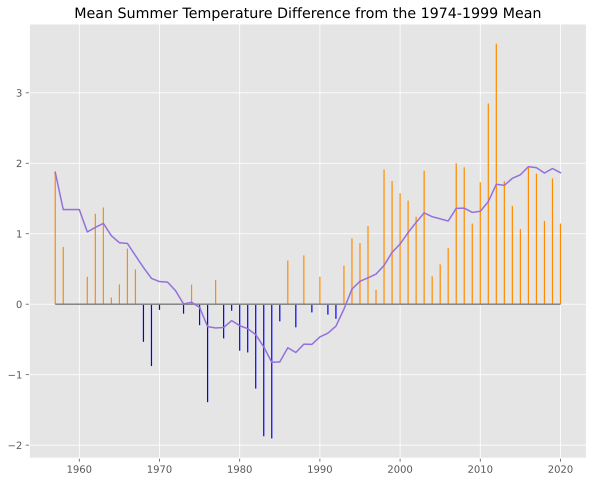

In [259]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))
plt.bar(x[diff>0].index, diff[diff>0], bottom=0, width=0.15, color='darkorange')
plt.bar(x[diff<0].index, diff[diff<0], bottom=0, width=0.15, color='blue')        
plt.plot(x.index, rolling_avg-base, linewidth=1.5 ,color='mediumpurple')
plt.hlines(y=0, xmin=1957, xmax=2020, linewidth=1.5, color='grey')
plt.title('Mean Summer Temperature Difference from the 1974-1999 Mean', size=14.25)
plt.savefig("mean_summer_temperature_difference_P2822122.svg")

### Interpretation of the figure

The plot depicts the summer average mean temperature anomalies in Greece from 1957 to 2020. We can observe that that the first 10 years from 1957 to 1967 had temperatures higher than the baseline until there was a drop in temperatures between 1968 to 1992 and specifically the coolest summer record was in 1984.  Following that, there is a clear ascending trend of the 10 years rolling average from year 1993 until 2020, while the warmest summers were in 2011 and 2012.

# Q3: Evolution of Daily Temperatures

* We will first need the average temperature for each day for the full period from 1955 to 2020.

In [260]:
temp_avg = weather.loc[:,['DATE', 'TAVG']]
temp_avg

,DATE,TAVG
0,1955-01-01,NaN
1,1955-01-02,NaN
2,1955-01-03,NaN
3,1955-01-04,NaN
4,1955-01-05,NaN
...,...,...
24102,2020-12-27,16.67
24103,2020-12-28,15.00
24104,2020-12-29,16.11
24105,2020-12-30,16.67


* We will also calculate the 30 years rolling average and we will add this to our `temp_avg` data frame.

In [261]:
temp_avg['rolling_avg30']= temp_avg.TAVG.rolling(window=30, min_periods=1).mean()
temp_avg

,DATE,TAVG,rolling_avg30
0,1955-01-01,NaN,NaN
1,1955-01-02,NaN,NaN
2,1955-01-03,NaN,NaN
3,1955-01-04,NaN,NaN
4,1955-01-05,NaN,NaN
...,...,...,...
24102,2020-12-27,16.67,14.092000
24103,2020-12-28,15.00,14.166000
24104,2020-12-29,16.11,14.166000
24105,2020-12-30,16.67,14.221667


* Following that we need the average daily temperature for the baseline period of 1974-1999

In [262]:
temp_base = weather.loc[(weather.DATE.dt.year>=1974) & (weather.DATE.dt.year<=1999)]
temp_base = temp_base.loc[:,['DATE', 'TAVG']]
temp_base

,DATE,TAVG
6940,1974-01-01,11.67
6941,1974-01-02,13.89
6942,1974-01-03,12.22
6943,1974-01-04,10.56
6944,1974-01-05,9.44
...,...,...
16431,1999-12-27,15.56
16432,1999-12-28,16.67
16433,1999-12-29,15.00
16434,1999-12-30,13.33


* And we will also calculate the 30 years rolling average for the baseline and add it to `temp_base`.

In [263]:
group_temp_base = temp_base.groupby([temp_base.DATE.dt.month, temp_base.DATE.dt.day])
roll_base30 = group_temp_base.TAVG.mean().rolling(window=30, min_periods=1).mean()
roll_base30

DATE  DATE
1     1       10.363846
      2       10.534038
      3       10.427179
      4       10.218942
      5       10.166615
                ...    
12    27      11.620333
      28      11.528436
      29      11.450808
      30      11.410218
      31      11.366051
Name: TAVG, Length: 366, dtype: float64

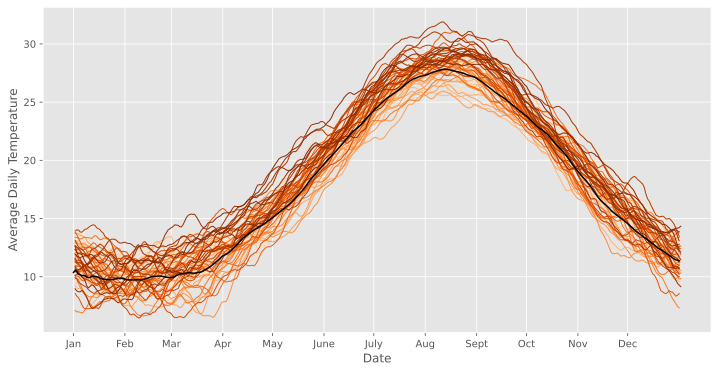

In [264]:
sns.set_palette(sns.color_palette("Oranges",66))
plt.figure(figsize = (12,6))
day = [0,31,59,90,120,151,181,212,243,273,304,334]
lab = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
     'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(day, lab)
for i in range(1955,2021):
    
    if (temp_avg.DATE.loc[temp_avg.DATE.dt.year==i].value_counts().sum())==365:
        
        l=range(1,366)
      
    else:
        
        l=range(1,367)
        
    sns.lineplot(x=l, y=temp_avg.rolling_avg30.loc[temp_avg.DATE.dt.year==i], linewidth = 1)


plot=sns.lineplot(x = 1,
            y = temp_avg.rolling_avg30.loc[temp_avg.DATE.dt.year==i], linewidth=1)

plot.set(xlabel='Date',ylabel='Average Daily Temperature')
plt.plot(roll_base30.values, color='black')
plt.savefig("daily_average_temperature_P2822122.svg")

### Interpretation of the figure

In the graph above, we can observe that the mean average temperature of the year is fluctuating in increasing values as the years pass (for the most recent years the colour darkens). Furthermore, we can see that the greatest variation in mean average temperatures occurs in March, with a large interval between mean averages, while October has the smallest difference between mean averages. Furthermore, the baseline (black curve) from 1974 to 1999 is always lower than the most recent years and usually higher than the years 1955-1973. The hottest month is August and February seems to be the coldest month.

# Q4: Extreme Temperature Events

* We will first need to calculate the baseline. We'll start by making a new dataframe with the dates 1974-1999.

In [265]:
temp_base4 = weather.loc[(weather.DATE.dt.year>=1974) & (weather.DATE.dt.year<=1999)]
temp_base4 = temp_base4.loc[:,['DATE', 'TAVG']]
temp_base4

,DATE,TAVG
6940,1974-01-01,11.67
6941,1974-01-02,13.89
6942,1974-01-03,12.22
6943,1974-01-04,10.56
6944,1974-01-05,9.44
...,...,...
16431,1999-12-27,15.56
16432,1999-12-28,16.67
16433,1999-12-29,15.00
16434,1999-12-30,13.33


* Then in order to be able to select dates by year,month,day and pivot them accordingly i split the date in seperate year, month, day columns.

In [266]:
temp_base4 = pd.DataFrame({'YEAR': temp_base4.DATE.dt.year, 'MONTH': temp_base4.DATE.dt.month,'DAY': temp_base4.DATE.dt.day, 'TAVG': temp_base4.TAVG})
temp_base4

,YEAR,MONTH,DAY,TAVG
6940,1974,1,1,11.67
6941,1974,1,2,13.89
6942,1974,1,3,12.22
6943,1974,1,4,10.56
6944,1974,1,5,9.44
...,...,...,...,...
16431,1999,12,27,15.56
16432,1999,12,28,16.67
16433,1999,12,29,15.00
16434,1999,12,30,13.33


* Pivot by month and day to find the expected temperature for each day of every month for the baseline

In [267]:
pv = pd.pivot_table(temp_base4, values='TAVG', index=['MONTH', 'DAY'], aggfunc=np.mean)
pv

TAVG
MONTH DAY           
1     1    10.363846
      2    10.704231
      3    10.213462
      4     9.594231
      5     9.957308
...              ...
12    27    9.807692
      28   10.213846
      29   10.790000
      30   11.346154
      31   10.982692

[366 rows x 1 columns]

* Pivot with Year, Month, Day for all dates of the baseline data frame.

In [268]:
pv2 = pd.pivot_table(temp_base4, values='TAVG', index=['YEAR','MONTH', 'DAY'])
pv2

TAVG
YEAR MONTH DAY       
1974 1     1    11.67
           2    13.89
           3    12.22
           4    10.56
           5     9.44
...               ...
1999 12    27   15.56
           28   16.67
           29   15.00
           30   13.33
           31   15.00

[9487 rows x 1 columns]

* Reset index from the first pivot to make a dataframe with the expected temperatures for each day of each month

In [269]:
df1 = pv.reset_index()
df1

,MONTH,DAY,TAVG
0,1,1,10.363846
1,1,2,10.704231
2,1,3,10.213462
3,1,4,9.594231
4,1,5,9.957308
...,...,...,...
361,12,27,9.807692
362,12,28,10.213846
363,12,29,10.790000
364,12,30,11.346154


* Reset index to have dataframe with all dates and temperatures of the baseline

In [270]:
df2 = pv2.reset_index()
df2

,YEAR,MONTH,DAY,TAVG
0,1974,1,1,11.67
1,1974,1,2,13.89
2,1974,1,3,12.22
3,1974,1,4,10.56
4,1974,1,5,9.44
...,...,...,...,...
9482,1999,12,27,15.56
9483,1999,12,28,16.67
9484,1999,12,29,15.00
9485,1999,12,30,13.33


* We merge the data frames into one and we set a condition to find the extreme temperatures (the temperature is 10% more than the expected value)

In [271]:
df3 = pd.merge(df2, df1, on=['MONTH', 'DAY'], how='left')
df3 = df3.loc[(df3.TAVG_x > (df3.TAVG_y + (10/100) * df3.TAVG_y))]
df3 = df3.loc[:,['YEAR', 'MONTH', 'DAY', 'TAVG_x']]
df3

,YEAR,MONTH,DAY,TAVG_x
0,1974,1,1,11.67
1,1974,1,2,13.89
2,1974,1,3,12.22
3,1974,1,4,10.56
20,1974,1,21,10.56
...,...,...,...,...
9482,1999,12,27,15.56
9483,1999,12,28,16.67
9484,1999,12,29,15.00
9485,1999,12,30,13.33


* Pivot to count the number of days with extreme temperatures

In [272]:
pv_count_extreme=pd.pivot_table(df3, values='TAVG_x', index=['YEAR'], aggfunc = 'count')
pv_count_extreme

,TAVG_x
YEAR,
1974,65
1975,96
1976,77
1977,117
1978,76
1979,114
1980,62
1981,93
1982,49


* Pivot by year to count the number of days for each year of the baseline

In [273]:
pv_count = pd.pivot_table(temp_base4, values='TAVG', index=['YEAR'], aggfunc = 'count')
pv_count

,TAVG
YEAR,
1974,359
1975,364
1976,365
1977,365
1978,365
1979,365
1980,366
1981,365
1982,365


* Finally we calculate our baseline, which is the average percentage of extreme tempearture events of the baseline.

In [274]:
baseline = (pv_count_extreme.TAVG_x/pv_count.TAVG).mean()
baseline

0.24781823520651855

* Since we found our baseline we need to find extreme temperatures for all the years. We will first create a new data frame with all dates and temperatures.

In [275]:
temp_avg4  = weather.loc[:,['DATE', 'TAVG']]
temp_avg4

,DATE,TAVG
0,1955-01-01,NaN
1,1955-01-02,NaN
2,1955-01-03,NaN
3,1955-01-04,NaN
4,1955-01-05,NaN
...,...,...
24102,2020-12-27,16.67
24103,2020-12-28,15.00
24104,2020-12-29,16.11
24105,2020-12-30,16.67


* Following the same logic, we split the date to year, month, day columns.

In [276]:
temp_avg4 = pd.DataFrame({'YEAR': temp_avg4.DATE.dt.year, 'MONTH': temp_avg4.DATE.dt.month,'DAY': temp_avg4.DATE.dt.day, 'TAVG': temp_avg4.TAVG})
temp_avg4

,YEAR,MONTH,DAY,TAVG
0,1955,1,1,NaN
1,1955,1,2,NaN
2,1955,1,3,NaN
3,1955,1,4,NaN
4,1955,1,5,NaN
...,...,...,...,...
24102,2020,12,27,16.67
24103,2020,12,28,15.00
24104,2020,12,29,16.11
24105,2020,12,30,16.67


* Pivot with Year, Month, Day

In [277]:
pv_all = pd.pivot_table(temp_avg4, values='TAVG', index=['YEAR','MONTH', 'DAY'])
pv_all

TAVG
YEAR MONTH DAY       
1957 7     1    22.22
           2    26.11
           3    25.56
           4    26.67
           5    28.33
...               ...
2020 12    27   16.67
           28   15.00
           29   16.11
           30   16.67
           31   15.56

[21792 rows x 1 columns]

* Reset index to have dataframe with all dates and temperatures

In [278]:
df_all = pv_all.reset_index()
df_all

,YEAR,MONTH,DAY,TAVG
0,1957,7,1,22.22
1,1957,7,2,26.11
2,1957,7,3,25.56
3,1957,7,4,26.67
4,1957,7,5,28.33
...,...,...,...,...
21787,2020,12,27,16.67
21788,2020,12,28,15.00
21789,2020,12,29,16.11
21790,2020,12,30,16.67


* We merge the data frames into one and we set a condition to find the extreme temperatures (the temperature is 10% more than the expected value)

In [279]:
df4 = pd.merge(df_all, df1, on=['MONTH', 'DAY'], how='left')
df4 = df4.loc[(df4.TAVG_x > (df4.TAVG_y + (10/100) * df4.TAVG_y))]
df4 = df4.loc[:,['YEAR', 'MONTH', 'DAY', 'TAVG_x']]
df4

,YEAR,MONTH,DAY,TAVG_x
7,1957,7,8,29.44
8,1957,7,9,31.67
43,1957,8,13,33.89
44,1957,8,14,35.00
45,1957,8,15,33.89
...,...,...,...,...
21787,2020,12,27,16.67
21788,2020,12,28,15.00
21789,2020,12,29,16.11
21790,2020,12,30,16.67


* Pivot to count the number of days with all extreme temperatures.

In [280]:
pv_count_extreme_all=pd.pivot_table(df4, values='TAVG_x', index=['YEAR'], aggfunc = 'count')
pv_count_extreme_all

,TAVG_x
YEAR,
1957,48
1958,133
1961,134
1962,154
1963,142
...,...
2016,160
2017,167
2018,169


* Pivot by year to count the number of days for each year

In [281]:
pv_count_all = pd.pivot_table(temp_avg4, values='TAVG', index=['YEAR'], aggfunc = 'count')
pv_count_all

,TAVG
YEAR,
1955,0
1956,0
1957,184
1958,365
1959,0
...,...
2016,366
2017,365
2018,365


* To create the vertical bars in our chart we need to calculate the percentage of extreme heat events calculated over the number of observations for each year.

In [282]:
bars = (pv_count_extreme_all.TAVG_x/pv_count_all.TAVG)
bars

YEAR
1955         NaN
1956         NaN
1957    0.260870
1958    0.364384
1959         NaN
          ...   
2016    0.437158
2017    0.457534
2018    0.463014
2019    0.446575
2020    0.459016
Length: 66, dtype: float64

* Time for plotting:

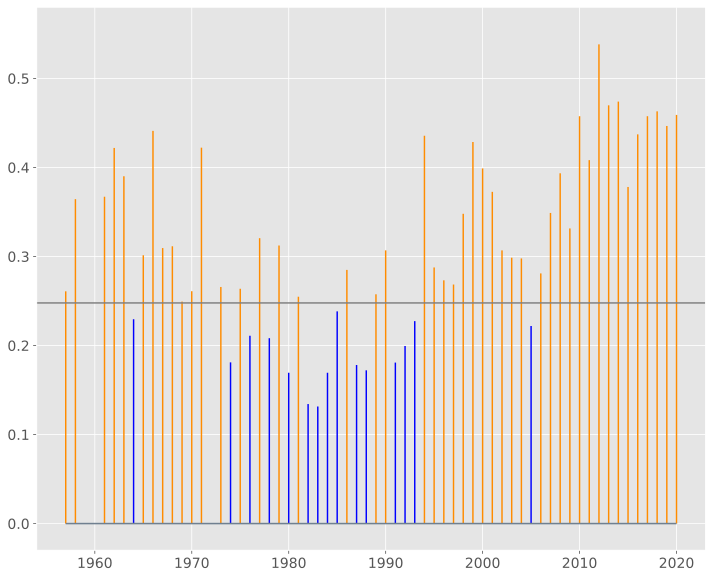

In [283]:
plt.figure(figsize=(12,10))
plt.ylim(-0.03,0.58)
plt.xlim(1954,2023)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(bars[bars.values<baseline].index, bars[bars.values<baseline], bottom=0, width=0.15, color='blue')
plt.bar(bars[bars.values>baseline].index, bars[bars.values>baseline], bottom=0, width=0.15, color='darkorange')
plt.axhline(y=baseline, color='grey', linestyle='-')
plt.hlines(y=0, xmin=1957, xmax=2020, linewidth=1.5, color='slategrey')
plt.savefig("extreme_temperature_events_P2822122.svg")

### Interpretation of the figure

We can observe that the year with the highest percentage of extreme heat temperatures over the number of observations was 2012 and the year with the lowest percentage was 1983. We can also observe that for the years after 2010 the percentage is generally higher than all the previous years. There are also a lot of years with percentages below the baseline through 1974 to 1993 (which is not very common as well).

### Q5: Precipitation

* We will need a new dataset with the rainy days.

In [284]:
rain = weather.loc[(weather.PRCP > 0)]
rain = rain.loc[:,['DATE', 'PRCP']]
rain

,DATE,PRCP
1,1955-01-02,2.03
8,1955-01-09,3.05
10,1955-01-11,0.51
18,1955-01-19,1.52
19,1955-01-20,5.59
...,...,...
24065,2020-11-20,1.02
24075,2020-11-30,4.06
24079,2020-12-04,5.59
24088,2020-12-13,8.89


* Then we will group by year and calculate the amount of rain for each year.

In [285]:
rain_yearly = rain.PRCP.groupby(rain.DATE.dt.year).sum()
rain_yearly

DATE
1955    547.36
1956    281.41
1957    302.47
1958    350.20
1959    213.85
         ...  
2016    261.32
2017    304.38
2018    380.42
2019    570.23
2020    210.29
Name: PRCP, Length: 66, dtype: float64

* Next step would be to count the number of rainy days per year

In [286]:
rainy_days = weather.loc[(weather.PRCP > 0)]
rainy_days = rainy_days.loc[:,['DATE', 'PRCP']]
rainy_days
rainy_days = rainy_days.PRCP.groupby(rain.DATE.dt.year).count()
rainy_days

DATE
1955    67
1956    50
1957    66
1958    65
1959    57
        ..
2016    42
2017    48
2018    55
2019    58
2020    38
Name: PRCP, Length: 66, dtype: int64

* Then, we will need the ratio of rainfall over rainy days.

In [287]:
ratio = rain_yearly/rainy_days
ratio

DATE
1955    8.169552
1956    5.628200
1957    4.582879
1958    5.387692
1959    3.751754
          ...   
2016    6.221905
2017    6.341250
2018    6.916727
2019    9.831552
2020    5.533947
Name: PRCP, Length: 66, dtype: float64

* Final step before visualizing our results would be to calculate the 10 years rolling average of the ratio.

In [288]:
ratio_rolling = ratio.rolling(window=10, min_periods=1).mean()
ratio_rolling

DATE
1955    8.169552
1956    6.898876
1957    6.126877
1958    5.942081
1959    5.504016
          ...   
2016    6.542063
2017    6.620342
2018    6.766729
2019    7.213320
2020    7.052888
Name: PRCP, Length: 66, dtype: float64

* Let's plot the ratio of rainfall over rainy days over the years:

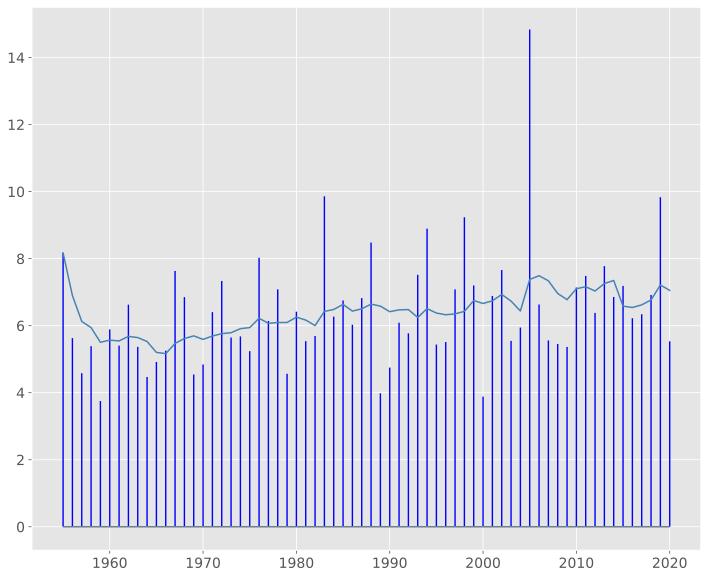

In [289]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.ylim(-0.7,15.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(ratio.index, ratio.values, bottom=0, width=0.15, color='blue')      
plt.plot(ratio.index, ratio_rolling, linewidth=1.5 ,color='steelblue')
plt.hlines(y=0, xmin=1955, xmax=2020, linewidth=1.5, color='slategrey')
plt.savefig("precipitation_P2822122.svg")

### Interpretation of the figure

From the above graph we can see that there are some years where precipitation becomes more intense. The most intense year was 2005, where the precipitation ratio exceeded all the other years. Following this, 1983 and 2019 had a lot of rain as well, while in general we can see that the overall rolling average of precipitation is generally higher during 2000-2020 than the years 1960-1999.